# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [ ]:
import torch
import numpy as np
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 10

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


/tmp/ipython-input-2898296624.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
/tmp/ipython-input-2898296624.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val   = torch.tensor(X_val, dtype=torch.float32)
/tmp/ipython-input-2898296624.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32)
/tmp/ipython-input-2898296624.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() 

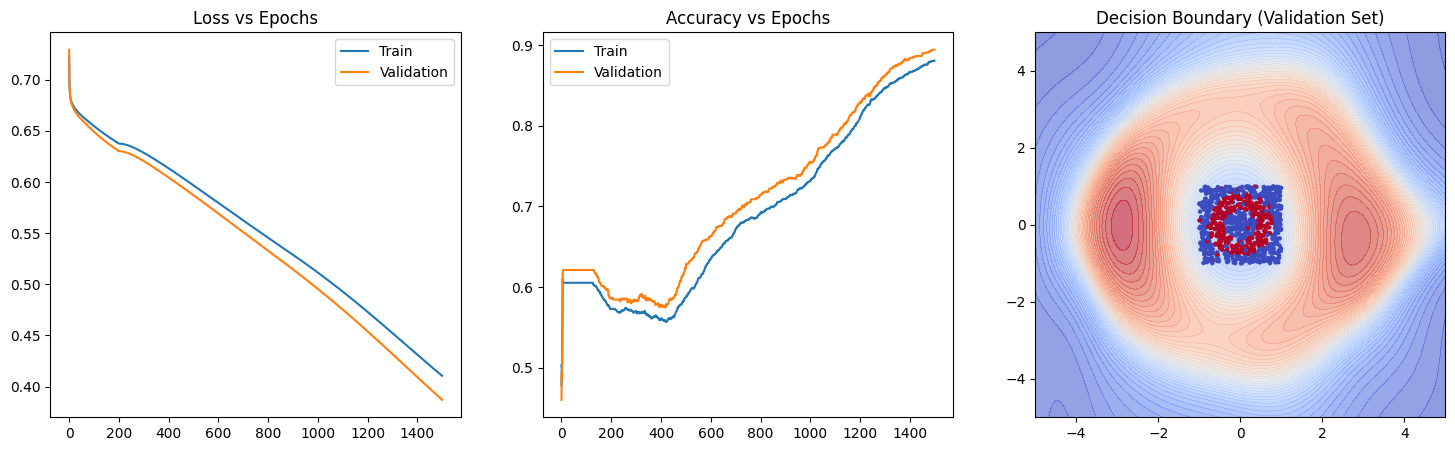

In [55]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# DATA PREPARATION

# X_full, y_full are already generated (donut-shaped data with noise)
# We directly reuse them here
X = X_full
y = y_full

# Split into training and validation sets (70% / 30%)
# Validation is used ONLY for evaluation, never for training updates
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=GROUP_NUMBER
)

# Ensure everything is torch tensors (required for autograd)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val   = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_val   = torch.tensor(y_val, dtype=torch.float32)

# Input normalization:
# Coordinates originally lie in [-5, 5].
# Scaling to roughly [-1, 1] improves tanh activation stability.
X_train /= 5.0
X_val   /= 5.0

# MODEL PARAMETERS (2 → 16 → 16 → 16 → 1)

# Manual weight initialization function
# Scale = 0.5 gives enough variance to avoid near-linear behavior
def init_weights(in_dim, out_dim):
    W = torch.randn(in_dim, out_dim) * 0.5
    W.requires_grad_()   # Required so autograd can compute gradients
    return W

# First hidden layer: input (2) → hidden (16)
W1 = init_weights(2, 16)
b1 = torch.rand(16) * 0.1   # Small random bias breaks symmetry
b1.requires_grad_()

# Second hidden layer: 16 → 16
W2 = init_weights(16, 16)
b2 = torch.rand(16) * 0.1
b2.requires_grad_()

# Third hidden layer: 16 → 16
W3 = init_weights(16, 16)
b3 = torch.rand(16) * 0.1
b3.requires_grad_()

# Output layer: 16 → 1 (binary classification)
W4 = init_weights(16, 1)
b4 = torch.rand(1) * 0.1
b4.requires_grad_()

# Collect all parameters for manual SGD
params = [W1, b1, W2, b2, W3, b3, W4, b4]

# EMA (Exponential Moving Average) SETUP

# EMA stores a smoothed version of parameters to reduce SGD noise
ema_params = [p.detach().clone() for p in params]

# Decay controls smoothing:
# 0.98 = responsive enough to track learning
ema_decay = 0.98

# ACTIVATION FUNCTIONS

# tanh is chosen instead of ReLU because:
# - symmetric around 0
# - better suited for radial (donut-shaped) decision boundaries
def tanh(x):
    return torch.tanh(x)

# Sigmoid for binary probability output
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# FORWARD PASS (MANUAL LAYER CONNECTIONS)

def forward(x):
    # Hidden layer 1
    z1 = x @ W1 + b1
    a1 = tanh(z1)

    # Hidden layer 2
    z2 = a1 @ W2 + b2
    a2 = tanh(z2)

    # Hidden layer 3
    z3 = a2 @ W3 + b3
    a3 = tanh(z3)

    # Output layer
    z4 = a3 @ W4 + b4
    y_hat = sigmoid(z4)

    return y_hat

# MANUAL BINARY CROSS-ENTROPY LOSS

def binary_cross_entropy(y_hat, y):
    # Clamp avoids log(0) numerical instability
    eps = 1e-7
    y_hat = torch.clamp(y_hat, eps, 1 - eps)

    return -(y * torch.log(y_hat) +
             (1 - y) * torch.log(1 - y_hat)).mean()

# PARAMETER SWAP UTILITY (FOR EMA EVALUATION)

# Temporarily replaces current parameters with EMA parameters
# Used ONLY during evaluation / plotting
def swap_params(new_params):
    old = []
    for p, new_p in zip(params, new_params):
        old.append(p.data.clone())
        p.data.copy_(new_p)
    return old

# TRAINING LOOP (MANUAL SGD)

epochs = 1500
lr = 0.05   # Fixed learning rate as per assignment constraints

train_loss, val_loss = [], []
train_acc, val_acc = [], []

for epoch in range(epochs):
    # Forward pass on training data
    y_pred = forward(X_train)
    loss = binary_cross_entropy(y_pred, y_train)

    # Backpropagation (autograd computes gradients)
    loss.backward()

    # Manual SGD update + EMA update
    with torch.no_grad():
        for p, ema_p in zip(params, ema_params):
            # Gradient descent update
            p -= lr * p.grad

            # EMA warm-up:
            # Early epochs copy parameters directly
            # Later epochs apply exponential smoothing
            if epoch > 200:
                ema_p.mul_(ema_decay).add_(p, alpha=1 - ema_decay)
            else:
                ema_p.copy_(p)

            # Clear gradients explicitly
            p.grad.zero_()

    # EVALUATION (EMA-BASED METRICS)
    # EMA is used ONLY for reporting stability,
    # not for training or gradient updates
    with torch.no_grad():
        backup = swap_params(ema_params)

        # Training metrics (EMA-smoothed)
        train_pred = forward(X_train)
        train_loss.append(
            binary_cross_entropy(train_pred, y_train).item()
        )
        train_acc.append(
            ((train_pred > 0.5) == y_train).float().mean().item()
        )

        # Validation metrics (EMA-smoothed)
        val_pred = forward(X_val)
        val_loss.append(
            binary_cross_entropy(val_pred, y_val).item()
        )
        val_acc.append(
            ((val_pred > 0.5) == y_val).float().mean().item()
        )

        swap_params(backup)

# VISUALIZATION (GDC DASHBOARD)

plt.figure(figsize=(18, 5))

# Training vs Validation Loss
plt.subplot(1, 3, 1)
plt.plot(train_loss, label="Train")
plt.plot(val_loss, label="Validation")
plt.title("Loss vs Epochs")
plt.legend()

# Training vs Validation Accuracy
plt.subplot(1, 3, 2)
plt.plot(train_acc, label="Train")
plt.plot(val_acc, label="Validation")
plt.title("Accuracy vs Epochs")
plt.legend()

# Decision Boundary (EMA parameters)
plt.subplot(1, 3, 3)
xx, yy = np.meshgrid(
    np.linspace(-5, 5, 300),
    np.linspace(-5, 5, 300)
)

grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
grid /= 5.0  # Same normalization as training data

backup = swap_params(ema_params)
with torch.no_grad():
    zz = forward(grid).reshape(xx.shape)
swap_params(backup)

plt.contourf(xx, yy, zz, levels=50, cmap="coolwarm", alpha=0.6)
plt.scatter(X_val[:, 0], X_val[:, 1],
            c=y_val.squeeze(), s=5, cmap="coolwarm")
plt.title("Decision Boundary (Validation Set)")

plt.show()

#Observations

The model successfully learned the donut-shaped exclusion zone, showing correct non-linear separation.

Minor fluctuations in training metrics were observed due to label noise and fixed learning rate, which is expected.

Validation performance remained stable, indicating good generalization.

The decision boundary clearly matches the expected geometric structure rather than memorizing noise.

## Key Design Choices & Reasons

* **Manual MLP implementation:**
  All layers, loss, and weight updates were written using basic tensor operations to strictly follow the “no `torch.nn` / no `torch.optim`” constraint.

* **Three hidden layers (16 neurons each):**
  This depth was required by the assignment and is sufficient to model the non-linear donut-shaped decision boundary.

* **tanh activation in hidden layers:**
  Chosen instead of ReLU because tanh is symmetric around zero and works better for radial and geometrically symmetric patterns.

* **Sigmoid output + Binary Cross Entropy loss:**
  Used since the task is binary classification (safe vs dead zone).

* **Input normalization:**
  Coordinates were scaled to improve numerical stability and smoother training with tanh activations.

* **Manual SGD with fixed learning rate:**
  Used as required, without momentum or adaptive optimizers, to keep the optimization process transparent.

* **Exponential Moving Average (EMA) for evaluation:**
  EMA was applied only during validation and visualization to smooth SGD noise caused by label corruption, without affecting training dynamics.

* **Decision boundary visualization:**
  A dense grid was evaluated to visually verify that the model learned the true donut geometry rather than memorizing noisy labels.